# Install required packages

In [1]:
!pip install ipykernel -U --user --force-reinstall
!pip install scikit-learn
!pip install sklearn_evaluation
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
  Using cached async_lru-2.0.5-py3-none-any.whl.metadata (4.5 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jupyter_lsp-2.3.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached jupyter_server-2.17.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached argon2_cffi-25.1.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached jupyter_events-0.12.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached jupyter_server_terminals-0.5.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached prometheus_client-0.23.1-py3-none-any.whl.metadata (1.9 kB)
  Usin

# Split dataset into training and test using Train_Test_Split method

In [2]:
# Preprocessing
import pandas as pd #import pandas library for reading CSV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset and drop duplicates if any
data = pd.read_csv('steel.csv')
data = data.drop_duplicates().reset_index(drop=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('tensile_strength', axis=1),  # Drop the target column from features
    data['tensile_strength'], # Target variable
    test_size=0.25, # 25% test size
    random_state=42) # Random state for reproducibility 



# K Nearest Neighbour Model Fitting Without any Preprocessing or Cross Fold Validation

In [3]:
# ==== GAUSSIAN PROCESS REGRESSION MODEL TRAINING WITH DEFAULT HYPERPARAMETERS (without cross fold validation)====

from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)

print("KNN Regression Default Model Performance no preprocessing or Cross fold validation:")
print("\n=== Training Data Performance ===")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.4f}") # Mean Squared Error for training data
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}") # Metric for how well model performs on training data it already saw

y_test_pred = knn_model.predict(X_test)
print("\n=== Test Data Performance ===")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.4f}") # Mean Squared Error for test data
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}") # Metric for how well model performs on test data it hasn't seen before

KNN Regression Default Model Performance no preprocessing or Cross fold validation:

=== Training Data Performance ===
Train MSE: 2198.7867
Train R²: 0.7278

=== Test Data Performance ===
Test MSE: 2487.1518
Test R²: 0.7212


# 10 Fold Cross Validation with no pre processing

In [4]:
# ==== GAUSSIAN PROCESS REGRESSION MODEL TRAINING WITH DEFAULT HYPERPARAMETERS====

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

knn_default = KNeighborsRegressor()

cv_results_default = cross_validate(
    knn_default,
    X_train,  
    y_train, 
    cv=10,
    scoring={
        'mse': 'neg_mean_squared_error',  # Domain-specific
        'r2': 'r2'                         # Domain-independent
    },
    return_train_score=True,
    n_jobs=-1
)

print("\nDefault Results (averaged over 10 folds):")
print(f"  Training MSE:   {-cv_results_default['train_mse'].mean():.4f} "
      f"(± {cv_results_default['train_mse'].std():.4f})")
print(f"  Test MSE:       {-cv_results_default['test_mse'].mean():.4f} "
      f"(± {cv_results_default['test_mse'].std():.4f})")
print(f"  Training R²:    {cv_results_default['train_r2'].mean():.4f} "
      f"(± {cv_results_default['train_r2'].std():.4f})")
print(f"  Test R²:        {cv_results_default['test_r2'].mean():.4f} "
      f"(± {cv_results_default['test_r2'].std():.4f})")


Default Results (averaged over 10 folds):
  Training MSE:   2243.2650 (± 83.5524)
  Test MSE:       3392.2180 (± 671.9795)
  Training R²:    0.7222 (± 0.0074)
  Test R²:        0.5628 (± 0.0757)


# Data Pre-processing

### Scale the Features in the dataset

In [5]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

print("\nOriginal feature ranges:")
print(X_train.describe().loc[['min', 'max']])
print("\nScaled feature ranges:")
print(X_train_scaled.describe().loc[['min', 'max']])

X_test_scaled  = scaler.transform(X_test)



Original feature ranges:
     normalising_temperature  tempering_temperature  percent_silicon  \
min                    178.5                  225.0           0.0000   
max                    945.0                  950.0           0.3594   

     percent_chromium  percent_copper  percent_nickel  percent_sulphur  \
min          0.745783           0.594           0.801            0.000   
max          1.794173           0.945           1.125            0.322   

     percent_carbon  percent_manganese  
min           1.378               0.00  
max           2.470               1.93  

Scaled feature ranges:
     normalising_temperature  tempering_temperature  percent_silicon  \
min                -1.583211              -1.928571         0.000000   
max                 2.448454               0.142857         2.768875   

     percent_chromium  percent_copper  percent_nickel  percent_sulphur  \
min         -1.244820       -2.617051       -1.807359           -0.635   
max          1.172941 

### Feature Elimination

In [6]:
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np

# Using correlation-based selection
selector = SelectKBest(score_func=f_regression, k=6)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Get selected feature names
selected_features = X_train_scaled_df.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['normalising_temperature', 'tempering_temperature', 'percent_silicon',
       'percent_copper', 'percent_sulphur', 'percent_carbon'],
      dtype='object')


/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


### Test out model performance after feature scaling with 10 fold cross validation using default hyperparameters

In [7]:
# ==== GAUSSIAN PROCESS REGRESSION MODEL TRAINING WITH DEFAULT HYPERPARAMETERS (With cross fold validation after feature scaling)====

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

knn_model = KNeighborsRegressor()

cv_results_fs = cross_validate(
    knn_model,
    X_train_scaled,  
    y_train, 
    cv=10,
    scoring={
        'mse': 'neg_mean_squared_error',  # Domain-specific
        'r2': 'r2'                         # Domain-independent
    },
    return_train_score=True,
    n_jobs=-1
)

print("\nDefault Results (averaged over 10 folds) with feature scaling:")
print(f"  Training MSE:   {-cv_results_fs['train_mse'].mean():.4f} "
      f"(± {cv_results_fs['train_mse'].std():.4f})")
print(f"  Test MSE:       {-cv_results_fs['test_mse'].mean():.4f} "
      f"(± {cv_results_fs['test_mse'].std():.4f})")
print(f"  Training R²:    {cv_results_fs['train_r2'].mean():.4f} "
      f"(± {cv_results_fs['train_r2'].std():.4f})")
print(f"  Test R²:        {cv_results_fs['test_r2'].mean():.4f} "
      f"(± {cv_results_fs['test_r2'].std():.4f})")


Default Results (averaged over 10 folds) with feature scaling:
  Training MSE:   1132.0770 (± 31.7017)
  Test MSE:       1829.2547 (± 619.5327)
  Training R²:    0.8597 (± 0.0061)
  Test R²:        0.7659 (± 0.0682)


### Test out model performance with feature scaling + feature selection

In [8]:
# ==== GAUSSIAN PROCESS REGRESSION MODEL TRAINING WITH DEFAULT HYPERPARAMETERS (With cross fold validation after feature scaling)====

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

knn_model = KNeighborsRegressor()

cv_results_fs_fe = cross_validate(
    knn_model,
    X_train_scaled_df[selected_features],  
    y_train, 
    cv=10,
    scoring={
        'mse': 'neg_mean_squared_error',  # Domain-specific
        'r2': 'r2'                         # Domain-independent
    },
    return_train_score=True,
    n_jobs=-1
)

print("\nDefault Results (averaged over 10 folds) with feature scaling and feature selection:")
print(f"  Training MSE:   {-cv_results_fs_fe['train_mse'].mean():.4f} "
      f"(± {cv_results_fs_fe['train_mse'].std():.4f})")
print(f"  Test MSE:       {-cv_results_fs_fe['test_mse'].mean():.4f} "
      f"(± {cv_results_fs_fe['test_mse'].std():.4f})")
print(f"  Training R²:    {cv_results_fs_fe['train_r2'].mean():.4f} "
      f"(± {cv_results_fs_fe['train_r2'].std():.4f})")
print(f"  Test R²:        {cv_results_fs_fe['test_r2'].mean():.4f} "
      f"(± {cv_results_fs_fe['test_r2'].std():.4f})")


Default Results (averaged over 10 folds) with feature scaling and feature selection:
  Training MSE:   1013.3537 (± 37.5098)
  Test MSE:       1581.4092 (± 374.5860)
  Training R²:    0.8745 (± 0.0045)
  Test R²:        0.7954 (± 0.0461)


# Hyperparameter/ Model Fine Tuning With GridSearchCV

### GridSearch NOT using scaled features

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

parameters = {
    'metric': [
        'euclidean',
        'manhattan',
        'chebyshev',
        'minkowski'
    ],

    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
}

knn_default_tuned = GridSearchCV(knn_model, 
                   parameters,
                   cv=10,
                   n_jobs=-1,
                   verbose=2,
                   scoring = {
                       'mse': 'neg_mean_squared_error',
                       'r2': 'r2'
                   },
                   refit = 'mse',
                   return_train_score=True
                )

# Fit the model
knn_default_tuned.fit(X_train, y_train)

# Print best parameters and score
print(f"\nBest parameters found:")
print(f"  Distance Metric: {knn_default_tuned.best_params_['metric']}")
print(f"  Number of Neighbors:  {knn_default_tuned.best_params_['n_neighbors']}")
print(f"  Best CV MSE: {-knn_default_tuned.best_score_:.4f}")

Fitting 10 folds for each of 44 candidates, totalling 440 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean,

### GridSearch with Feature Scaling

In [10]:

from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn_evaluation import plot
 
parameters = {
    'metric': [
        'euclidean',
        'manhattan',
        'chebyshev',
        'minkowski'
    ],

    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
}

knn_scaled_tuned = GridSearchCV(knn_model, 
                   parameters,
                   cv=10,
                   n_jobs=-1,
                   verbose=2,
                   scoring = {
                       'mse': 'neg_mean_squared_error',
                       'r2': 'r2'
                   },
                   refit = 'mse',
                   return_train_score=True
                )

# Fit the model
knn_scaled_tuned.fit(X_train_scaled, y_train)

# Print best parameters and score
print(f"\nBest parameters found:")
print(f"  Distance Metric: {knn_scaled_tuned.best_params_['metric']}")
print(f"  Number of Neighbors:  {knn_scaled_tuned.best_params_['n_neighbors']}")
print(f"  Best CV MSE: {-knn_scaled_tuned.best_score_:.4f}")

Fitting 10 folds for each of 44 candidates, totalling 440 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean,

### GridSearch with Feature Scaling + Feature Selection

In [11]:
 
parameters = {
    'metric': [
        'euclidean',
        'manhattan',
        'chebyshev',
        'minkowski'
    ],

    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
}

knn_fe_fs_tuned = GridSearchCV(knn_model, 
                   parameters,
                   cv=10,
                   n_jobs=-1,
                   verbose=2,
                   scoring = {
                       'mse': 'neg_mean_squared_error',
                       'r2': 'r2'
                   },
                   refit = 'mse',
                   return_train_score=True
                )

# Fit the model
knn_fe_fs_tuned.fit(X_train_scaled_df[selected_features], y_train)

# Print best parameters and score
print(f"\nBest parameters found:")
print(f"  Distance Metric: {knn_fe_fs_tuned.best_params_['metric']}")
print(f"  Number of Neighbors:  {knn_fe_fs_tuned.best_params_['n_neighbors']}")
print(f"  Best CV MSE: {-knn_fe_fs_tuned.best_score_:.4f}")

Fitting 10 folds for each of 44 candidates, totalling 440 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean,

# Plot Results from GridSearchCV

### GridSearch for just Hyperparameter finetuning

['euclidean' 'manhattan' 'chebyshev' 'minkowski']


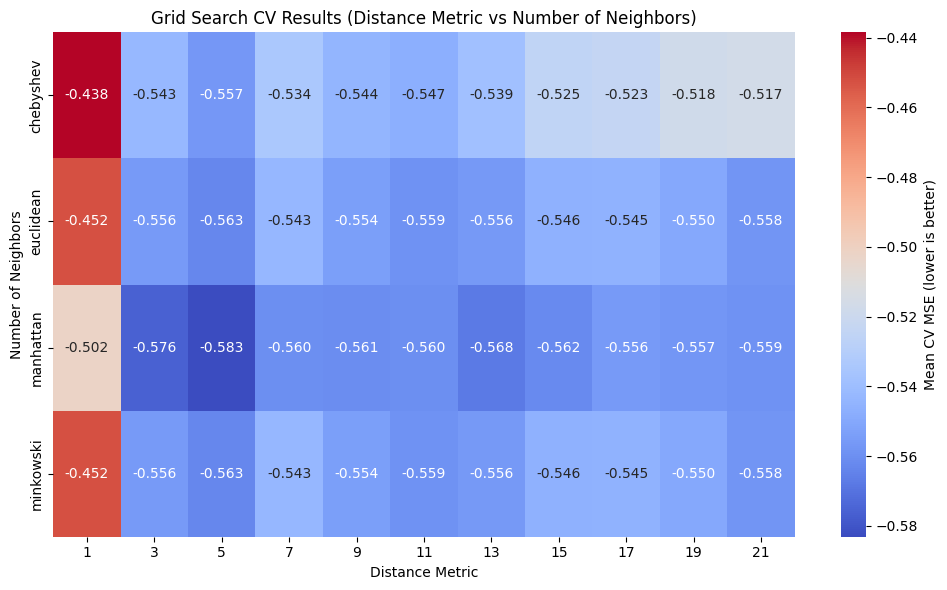

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract all results from GridSearchCV
cv_results_fine_tuned = pd.DataFrame(knn_default_tuned.cv_results_)

# To properly understand visually flip the sign of the mean test score (since it's negative MSE)
cv_results_fine_tuned['mean_R2'] = -cv_results_fine_tuned['mean_test_r2']
# Convert kernel objects to strings (so they're easy to plot)
cv_results_fine_tuned['param_metric'] = cv_results_fine_tuned['param_metric'].astype(str)
print(cv_results_fine_tuned['param_metric'].unique())

# cv_results['param_metric'] = cv_results['param_metric'].replace({
#     '1**2': 'ConstantKernel',
#     '1**2 * RBF(length_scale=1)': 'Constant*RBF',
#     'RBF(length_scale=1)': 'RBF',
#     'DotProduct(sigma_0=1)': 'DotProduct',
#     'WhiteKernel(noise_level=0.5)': 'WhiteKernel'
# })


# Pivot the results: rows=kernels, columns=alpha, values=mean MSE
pivot_table = cv_results_fine_tuned.pivot_table(
    values='mean_R2',
    index='param_metric',
    columns='param_n_neighbors'
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    cbar_kws={'label': 'Mean CV MSE (lower is better)'}
)
plt.title("Grid Search CV Results (Distance Metric vs Number of Neighbors)")
plt.xlabel("Distance Metric")
plt.ylabel("Number of Neighbors")
plt.tight_layout()
plt.show()


### GridSearch with Hyperparamter Finetuning + Feature Scaling

['euclidean' 'manhattan' 'chebyshev' 'minkowski']


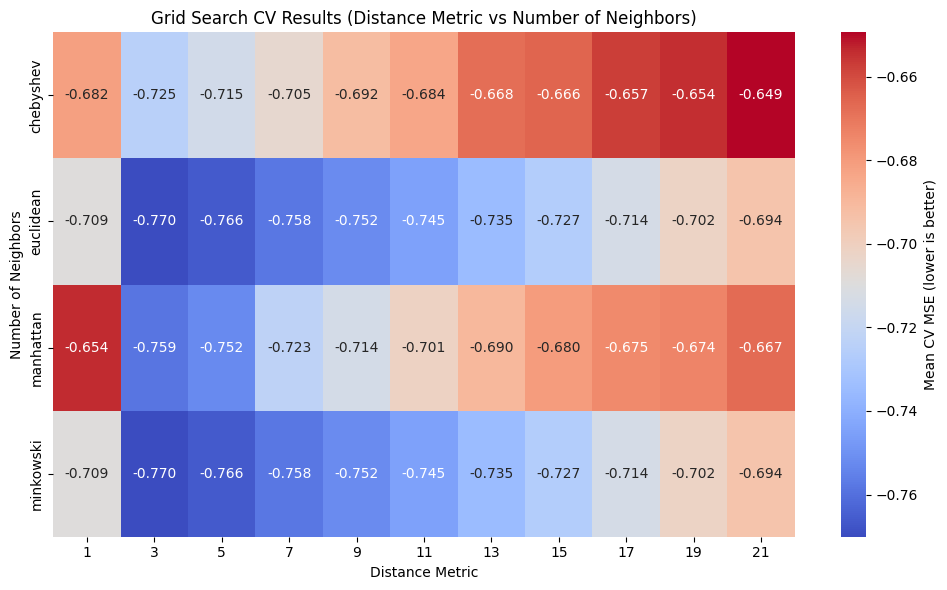

In [13]:
# Extract all results from GridSearchCV
cv_results_scaled = pd.DataFrame(knn_scaled_tuned.cv_results_)

# To properly understand visually flip the sign of the mean test score (since it's negative MSE)
cv_results_scaled['mean_R2'] = -cv_results_scaled['mean_test_r2']
# Convert kernel objects to strings (so they're easy to plot)
cv_results_scaled['param_metric'] = cv_results_scaled['param_metric'].astype(str)
print(cv_results_scaled['param_metric'].unique())

# cv_results['param_metric'] = cv_results['param_metric'].replace({
#     '1**2': 'ConstantKernel',
#     '1**2 * RBF(length_scale=1)': 'Constant*RBF',
#     'RBF(length_scale=1)': 'RBF',
#     'DotProduct(sigma_0=1)': 'DotProduct',
#     'WhiteKernel(noise_level=0.5)': 'WhiteKernel'
# })


# Pivot the results: rows=kernels, columns=alpha, values=mean MSE
pivot_table = cv_results_scaled.pivot_table(
    values='mean_R2',
    index='param_metric',
    columns='param_n_neighbors'
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    cbar_kws={'label': 'Mean CV MSE (lower is better)'}
)
plt.title("Grid Search CV Results (Distance Metric vs Number of Neighbors)")
plt.xlabel("Distance Metric")
plt.ylabel("Number of Neighbors")
plt.tight_layout()
plt.show()


## GridSearch for Hyperparameter Finetuning + Feature Scaling + Feature Selection

['euclidean' 'manhattan' 'chebyshev' 'minkowski']


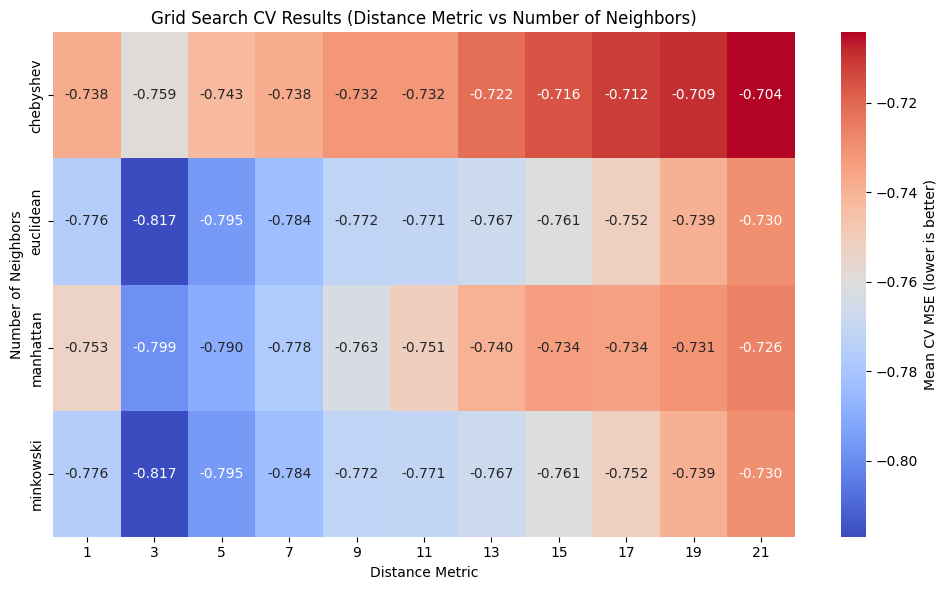

In [14]:
# Extract all results from GridSearchCV
cv_results_fs_fe = pd.DataFrame(knn_fe_fs_tuned.cv_results_)

# To properly understand visually flip the sign of the mean test score (since it's negative MSE)
cv_results_fs_fe['mean_R2'] = -cv_results_fs_fe['mean_test_r2']
# Convert kernel objects to strings (so they're easy to plot)
cv_results_fs_fe['param_metric'] = cv_results_fs_fe['param_metric'].astype(str)
print(cv_results_fs_fe['param_metric'].unique())

# cv_results['param_metric'] = cv_results['param_metric'].replace({
#     '1**2': 'ConstantKernel',
#     '1**2 * RBF(length_scale=1)': 'Constant*RBF',
#     'RBF(length_scale=1)': 'RBF',
#     'DotProduct(sigma_0=1)': 'DotProduct',
#     'WhiteKernel(noise_level=0.5)': 'WhiteKernel'
# })


# Pivot the results: rows=kernels, columns=alpha, values=mean MSE
pivot_table = cv_results_fs_fe.pivot_table(
    values='mean_R2',
    index='param_metric',
    columns='param_n_neighbors'
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    cbar_kws={'label': 'Mean CV MSE (lower is better)'}
)
plt.title("Grid Search CV Results (Distance Metric vs Number of Neighbors)")
plt.xlabel("Distance Metric")
plt.ylabel("Number of Neighbors")
plt.tight_layout()
plt.show()


# Generate Tables for Reporting Results on Test Dataset

In [15]:
# Using the best values from GridSearchCV to train a final model and test on hold-out test dataset

print("\nFinal Model Performance without Feature Scaling & Feature Selection:")

# Predict on training data
y_train_pred = knn_default_tuned.predict(X_train)
print("\n=== Training Data Performance ===")
print(f"Train MSE:  {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"Train R²:   {r2_score(y_train, y_train_pred):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")

# Predict on test data
y_test_pred = knn_default_tuned.predict(X_test)
print("\n=== Test Data Performance ===")
print(f"Test MSE:  {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"Test R²:   {r2_score(y_test, y_test_pred):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")


Final Model Performance without Feature Scaling & Feature Selection:

=== Training Data Performance ===
Train MSE:  2083.3808
Train R²:   0.7421
Train RMSE: 45.64

=== Test Data Performance ===
Test MSE:  2407.8347
Test R²:   0.7301
Test RMSE: 49.07


In [16]:
# Using the best values from GridSearchCV to train a final model and test on hold-out test dataset

# Convert scaled arrays back to DataFrames to preserve feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nFinal Model Performance with Feature Scaling:")

# Predict on training data
y_train_pred = knn_scaled_tuned.predict(X_train_scaled_df)
print("\n=== Training Data Performance ===")
print(f"Train MSE:  {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"Train R²:   {r2_score(y_train, y_train_pred):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")

# Predict on test data
y_test_pred = knn_scaled_tuned.predict(X_test_scaled_df)
print("\n=== Test Data Performance ===")
print(f"Test MSE:  {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"Test R²:   {r2_score(y_test, y_test_pred):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")


Final Model Performance with Feature Scaling:

=== Training Data Performance ===
Train MSE:  800.0094
Train R²:   0.9010
Train RMSE: 28.28

=== Test Data Performance ===
Test MSE:  2639.4832
Test R²:   0.7042
Test RMSE: 51.38


In [32]:
# Using the best values from GridSearchCV to train a final model and test on hold-out test dataset

# Convert scaled arrays back to DataFrames to preserve feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nFinal Model Performance with Feature Scaling + Feature Selection:")

# Predict on training data
y_train_pred = knn_fe_fs_tuned.predict(X_train_scaled_df[selected_features])
print("\n=== Training Data Performance ===")
print(f"Train MSE:  {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"Train R²:   {r2_score(y_train, y_train_pred):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")

# Predict on test data
y_test_pred = knn_fe_fs_tuned.predict(X_test_scaled_df[selected_features])
print("\n=== Test Data Performance ===")
print(f"Test MSE:  {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"Test R²:   {r2_score(y_test, y_test_pred):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")


Final Model Performance with Feature Scaling + Feature Selection:

=== Training Data Performance ===
Train MSE:  623.0821
Train R²:   0.9229
Train RMSE: 24.96

=== Test Data Performance ===
Test MSE:  1861.3835
Test R²:   0.7914
Test RMSE: 43.14


# Visualise Relationship between N_neighbours and Weight hypermaparameters

## For Unscaled

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

def plot_knn_hyperparameter_effects(X_train, y_train, X_test, y_test,
                                    n_values=[1,3,5,7,9,11,13,15,17,19,21],
                                    metrics=['euclidean', 'manhattan', 'chebyshev', 'minkowski']):
    
    results = []  # store (metric, n, r2, rmse)

    for metric in metrics:
        for n in n_values:
            knn = KNeighborsRegressor(n_neighbors=n, metric=metric)
            knn.fit(X_train, y_train)

            y_pred = knn.predict(X_test)

            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))

            results.append((metric, n, r2, rmse))

    # ===== PLOT R² vs n_neighbors =====
    plt.figure(figsize=(10, 6))

    for metric in metrics:
        r2_vals = [r2 for (m, n, r2, rmse) in results if m == metric]
        plt.plot(n_values, r2_vals, marker='o', linestyle='-', label=f"{metric}")

    plt.xlabel("n_neighbors")
    plt.ylabel("R² Score")
    plt.title("Effect of n_neighbors and metric on R² (KNN Regression)")
    plt.legend(title="Distance Metric")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # ===== PLOT RMSE vs n_neighbors =====
    plt.figure(figsize=(10, 6))

    for metric in metrics:
        rmse_vals = [rmse for (m, n, r2, rmse) in results if m == metric]
        plt.plot(n_values, rmse_vals, marker='o', linestyle='-', label=f"{metric}")

    plt.xlabel("n_neighbors")
    plt.ylabel("RMSE")
    plt.title("Effect of n_neighbors and metric on RMSE (KNN Regression)")
    plt.legend(title="Distance Metric")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    return results


## Plot Model Regression Surface


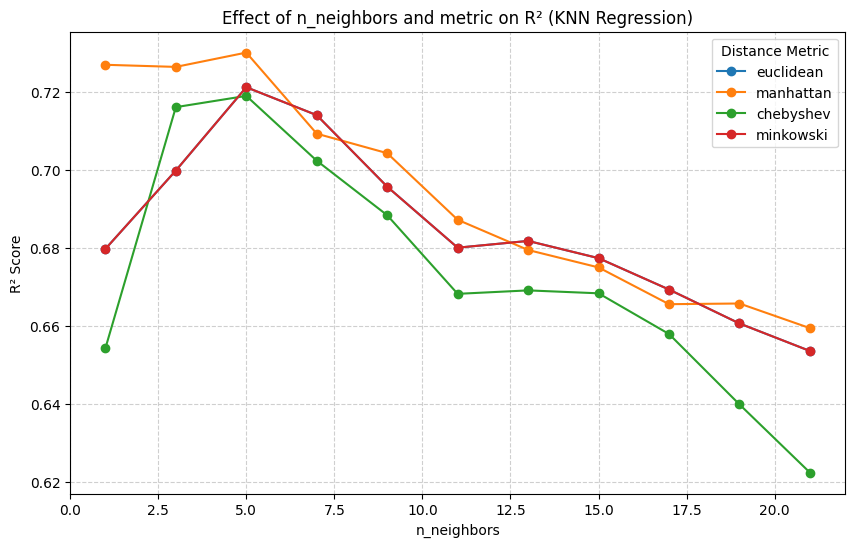

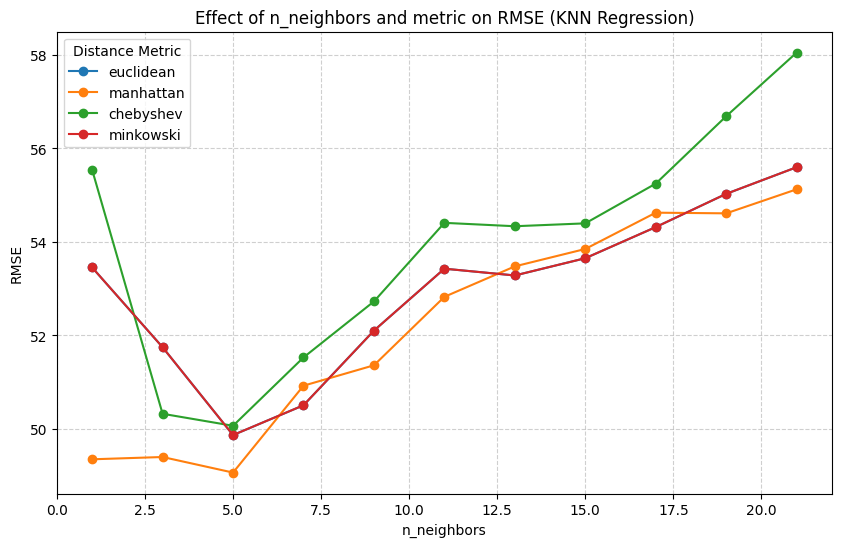

[('euclidean', 1, 0.6797549687710626, np.float64(53.45445803496939)),
 ('euclidean', 3, 0.6998622998094317, np.float64(51.749124390189856)),
 ('euclidean', 5, 0.7212487445001925, np.float64(49.87135253544085)),
 ('euclidean', 7, 0.714082152401682, np.float64(50.50837119155843)),
 ('euclidean', 9, 0.6957287803099985, np.float64(52.10425232029939)),
 ('euclidean', 11, 0.6800726593942448, np.float64(53.42793741458489)),
 ('euclidean', 13, 0.6818064722892124, np.float64(53.28296716439566)),
 ('euclidean', 15, 0.6773841396592356, np.float64(53.65195945355109)),
 ('euclidean', 17, 0.6693368564013545, np.float64(54.31698129466015)),
 ('euclidean', 19, 0.6606264527627478, np.float64(55.02774606865603)),
 ('euclidean', 21, 0.6535665265467069, np.float64(55.59716602643312)),
 ('manhattan', 1, 0.7270070548254421, np.float64(49.35355518533386)),
 ('manhattan', 3, 0.7264644932563475, np.float64(49.40257486023712)),
 ('manhattan', 5, 0.7301383243178067, np.float64(49.0696925592313)),
 ('manhattan', 

In [29]:
plot_knn_hyperparameter_effects(X_train, y_train, X_test, y_test)

## After feature Scaling

/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 2/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted 

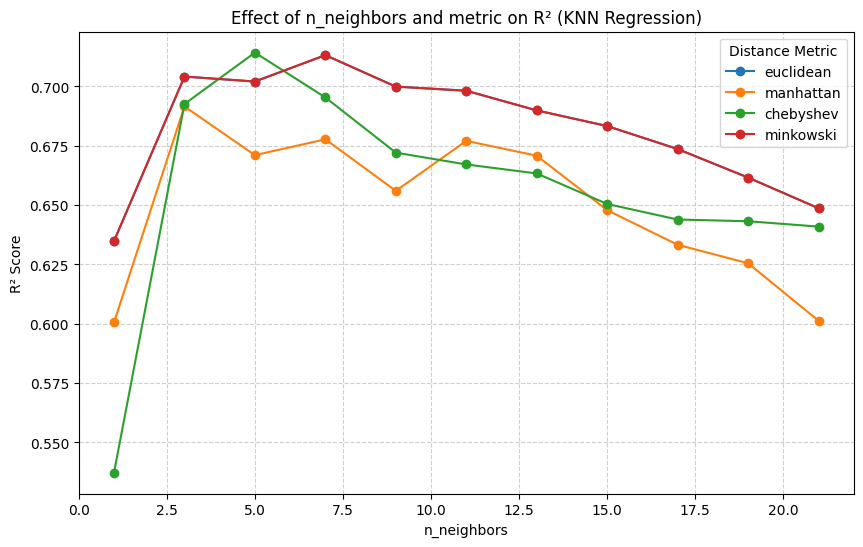

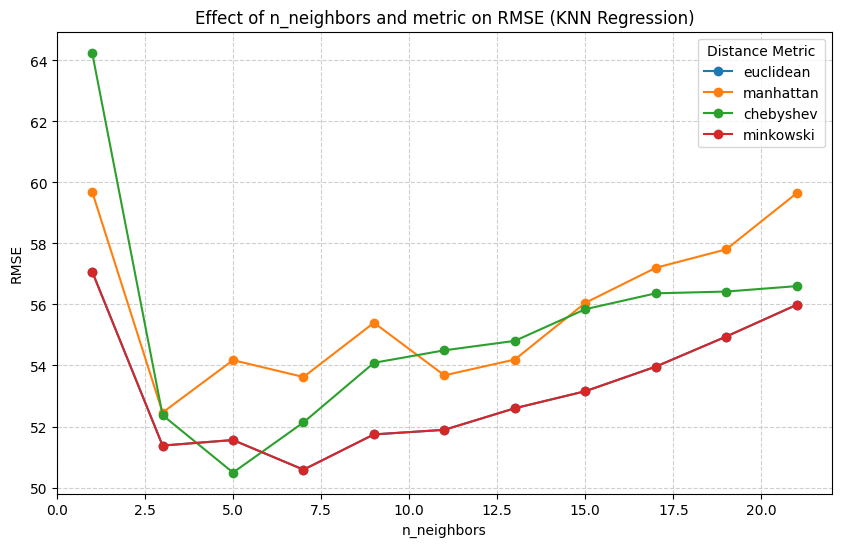

[('euclidean', 1, 0.6348588879373276, np.float64(57.078571764148755)),
 ('euclidean', 3, 0.7041759777372063, np.float64(51.37590077967462)),
 ('euclidean', 5, 0.7020849150118031, np.float64(51.55715896972622)),
 ('euclidean', 7, 0.7132062350212355, np.float64(50.58567893720692)),
 ('euclidean', 9, 0.6999465363592781, np.float64(51.74186193432875)),
 ('euclidean', 11, 0.6982080890841479, np.float64(51.89153623779675)),
 ('euclidean', 13, 0.6899269905469538, np.float64(52.5986639416349)),
 ('euclidean', 15, 0.683318530779304, np.float64(53.15621583591243)),
 ('euclidean', 17, 0.6736463202536447, np.float64(53.961869525895395)),
 ('euclidean', 19, 0.661620880553734, np.float64(54.94706614380494)),
 ('euclidean', 21, 0.6486896803768826, np.float64(55.98712727372563)),
 ('manhattan', 1, 0.600590252431848, np.float64(59.696938645915814)),
 ('manhattan', 3, 0.6915827522481813, np.float64(52.45803991696471)),
 ('manhattan', 5, 0.6710677359041942, np.float64(54.174631734373335)),
 ('manhattan',

In [30]:
plot_knn_hyperparameter_effects(X_train_scaled, y_train, X_test_scaled, y_test)

## After feature scaling and feature elimination

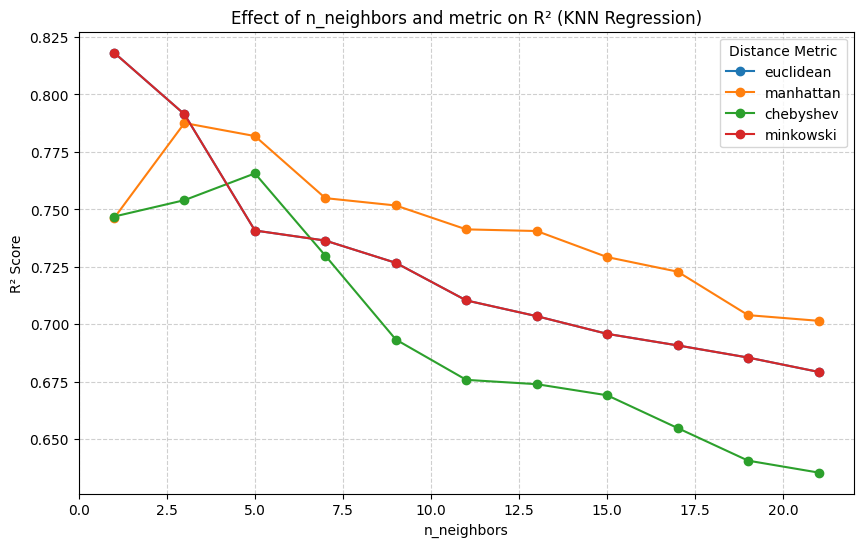

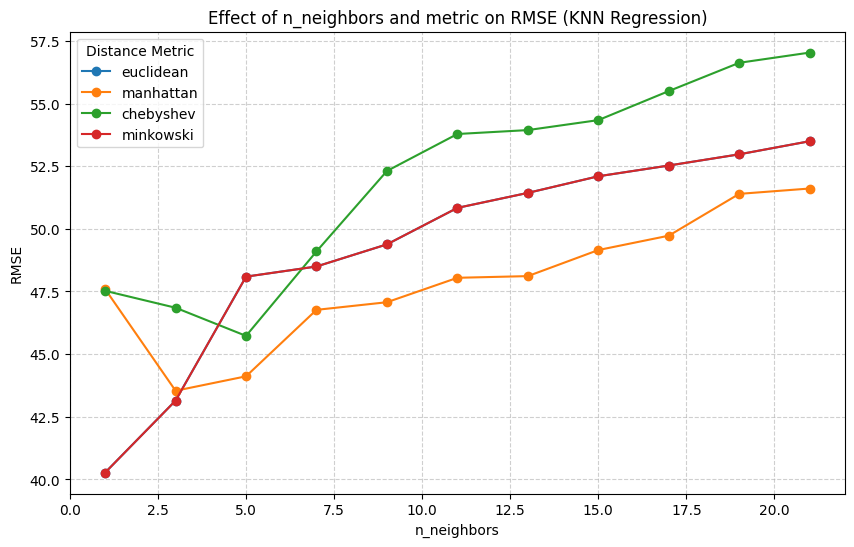

[('euclidean', 1, 0.8182495359050778, np.float64(40.26989477850174)),
 ('euclidean', 3, 0.7913826676598219, np.float64(43.14375334545105)),
 ('euclidean', 5, 0.7407817581866527, np.float64(48.0922959391655)),
 ('euclidean', 7, 0.7363875303181819, np.float64(48.49820953356607)),
 ('euclidean', 9, 0.7266997433778315, np.float64(49.38132631781827)),
 ('euclidean', 11, 0.7103400312117938, np.float64(50.83782600113912)),
 ('euclidean', 13, 0.7034796128118117, np.float64(51.43633425213783)),
 ('euclidean', 15, 0.6957815768262909, np.float64(52.099731612831036)),
 ('euclidean', 17, 0.6907499464284343, np.float64(52.52881726360975)),
 ('euclidean', 19, 0.6854600511609324, np.float64(52.97617969036057)),
 ('euclidean', 21, 0.6792151229863876, np.float64(53.49949388243292)),
 ('manhattan', 1, 0.7461158367122817, np.float64(47.59491289100489)),
 ('manhattan', 3, 0.7875681135017614, np.float64(43.536406906855895)),
 ('manhattan', 5, 0.7819002914550534, np.float64(44.113373720595995)),
 ('manhattan

In [31]:
plot_knn_hyperparameter_effects(X_train_scaled_df[selected_features], y_train, X_test_scaled_df[selected_features], y_test)